In [121]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("ola_driver_scaler.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)

In [28]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [29]:
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])

In [30]:
df.sort_values(by=['Driver_ID', 'MMM-YY'],inplace=True,ignore_index=True)

In [31]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [106]:
df_u = df.drop_duplicates(subset=['Driver_ID'],keep="last",ignore_index=True)

In [23]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
4,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
9,2020-04-01,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1
12,2019-03-01,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,1
17,2020-12-01,6,31.0,1.0,C11,1,78728,31/07/20,NaN,3,3,0,2


In [24]:
df['MMM-YY'].describe()

C:\Users\bharath.d.reddy\AppData\Local\Temp\ipykernel_21348\1916603724.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['MMM-YY'].describe()


count                    2381
unique                     24
top       2020-12-01 00:00:00
freq                      819
first     2019-01-01 00:00:00
last      2020-12-01 00:00:00
Name: MMM-YY, dtype: object

In [26]:
df.Driver_ID.nunique()

2381

In [109]:
df_u['target'] = df_u['LastWorkingDate'].notna().apply(int)

C:\Users\bharath.d.reddy\AppData\Local\Temp\ipykernel_21348\1014406890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u['target'] = df_u['LastWorkingDate'].notna().apply(int)


In [46]:
df = df.merge(df_u[['Driver_ID','left']],how='left' ,on='Driver_ID')

In [53]:
df.shape

(19104, 14)

In [52]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
left                        0
dtype: int64

df.head()

In [50]:
df.groupby(['Driver_ID'])['Driver_ID'].count().describe()

count    2381.00000
mean        8.02352
std         6.78359
min         1.00000
25%         3.00000
50%         5.00000
75%        10.00000
max        24.00000
Name: Driver_ID, dtype: float64

In [59]:
gender_na = df.loc[df['Gender'].isna(),'Driver_ID'].values

In [60]:
age_na = df.loc[df['Age'].isna(),'Driver_ID'].values

In [62]:
age_na

array([  20,   22,   24,   40,   49,   49,   63,   69,  103,  120,  167,
        179,  183,  204,  215,  305,  313,  325,  369,  422,  458,  541,
        560,  607,  617,  718,  718,  778,  901,  901,  954, 1050, 1072,
       1247, 1378, 1421, 1430, 1462, 1588, 1611, 1669, 1720, 1852, 1909,
       1932, 1936, 2073, 2073, 2168, 2273, 2348, 2351, 2460, 2507, 2569,
       2618, 2690, 2730, 2738, 2751, 2774], dtype=int64)

In [64]:
from sklearn.impute import KNNImputer

In [66]:
df_na =  df.loc[df['Driver_ID'].isin(gender_na),['Driver_ID','Age','Gender']]

In [88]:
df_na = df[['Driver_ID','Age','Gender']]

In [89]:
imputer = KNNImputer(n_neighbors=1)

In [90]:
imput = imputer.fit_transform(df_na)

In [95]:
df_na = pd.DataFrame(imput,columns=df_na.columns)

In [96]:
df['Gender'] = df_na['Gender']
df['Age'] = df_na['Age']

In [97]:
df_['Gender'].value_counts()

0.0    11103
1.0     8001
Name: Gender, dtype: int64

In [99]:
df['Age'].unique()

array([28., 31., 43., 29., 34., 35., 30., 39., 42., 27., 26., 33., 40.,
       41., 32., 22., 44., 36., 21., 49., 37., 38., 46., 47., 48., 25.,
       24., 45., 51., 52., 23., 50., 53., 54., 55., 58.])

In [102]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                         0
Gender                      0
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
left                        0
dtype: int64

In [103]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,1
1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0


In [104]:
df_u = pd.DataFrame

In [110]:
df_u.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left,target
0,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1,1
1,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0,0
2,2020-04-01,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1,1,1
3,2019-03-01,5,29.0,0.0,C9,0,46368,01/09/19,03/07/19,1,1,0,1,1,1
4,2020-12-01,6,31.0,1.0,C11,1,78728,31/07/20,NaN,3,3,0,2,0,0


In [117]:
# df.merge(df[['Driver_ID','left']],on='Driver_ID')

In [120]:
df.groupby(['Driver_ID','left'])['Quarterly Rating'].mean()

Driver_ID  left
1          1       2.000000
2          0       1.000000
4          1       1.000000
5          1       1.000000
6          0       1.600000
                     ...   
2784       0       2.625000
2785       1       1.000000
2786       1       1.666667
2787       1       1.500000
2788       0       2.285714
Name: Quarterly Rating, Length: 2381, dtype: float64

In [131]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,left
0,2019-01-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2,1
1,2019-02-01,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2,1
2,2019-03-01,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1,0


<AxesSubplot:xlabel='Quarterly Rating', ylabel='left'>

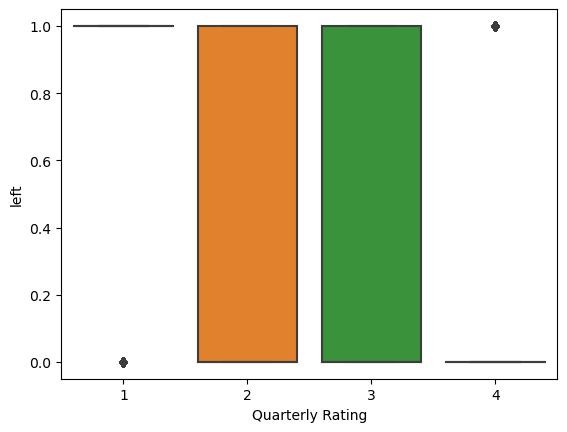

In [132]:
sns.boxplot(x=df['Quarterly Rating'],y=df['left'])

In [ ]:
for i,d in enumerate(df['Driver_ID'].unique()):
    df_ = df[df['Driver_ID']==d]
    if sum(df_['left'])==0:
        sns.scatterplot(data=df_,y='Quarterly Rating',x=range(len(df_)),hue=df_['left'])
        plt.show()
        if i>100:
            break

In [154]:
z_val_q = []
for i,d in enumerate(df_u['Driver_ID'].tolist()):
    df_= df[df['Driver_ID']==d]
    q_rate = df_['Quarterly Rating'].values
    z = 1.0*(q_rate[-1]-q_rate.mean())/q_rate.std()
    z_val_q.append(z)

C:\Users\bharath.d.reddy\AppData\Local\Temp\ipykernel_21348\3461315518.py:5: RuntimeWarning: invalid value encountered in double_scalars
  z = 1.0*(q_rate[-1]-q_rate.mean())/q_rate.std()


In [153]:
df_u.shape,len(z_val)

((2381, 15), 2381)

In [166]:
z_val_q

[0,
 0,
 0,
 0,
 0.8164965809277259,
 0,
 0,
 -1.0,
 -0.5940885257860049,
 0,
 0,
 -0.8660254037844387,
 0,
 0,
 -1.3416407864998738,
 -1.889822365046136,
 -0.6546536707079766,
 0.5773502691896258,
 -1.0871146130092182,
 -1.2247448713915894,
 0,
 1.0,
 -1.0,
 0,
 0.0,
 0,
 0,
 -0.8164965809277259,
 0,
 0.0,
 0,
 0,
 0,
 0.40824829046386274,
 0,
 0,
 -0.5477225575051662,
 0,
 0.8164965809277258,
 1.0,
 -1.1285761872936697,
 0,
 1.4411533842457842,
 -2.4865491809470197,
 0,
 0,
 -2.1213203435596424,
 0,
 0,
 0.20851441405707477,
 0,
 -1.0,
 0,
 0.7071067811865475,
 -0.5773502691896258,
 -0.9819805060619655,
 0,
 0,
 0,
 0,
 0,
 0.0,
 -0.8980265101338746,
 0,
 0,
 -1.2247448713915892,
 0,
 0,
 -0.392232270276368,
 0,
 0,
 0.5773502691896257,
 -1.0,
 -1.118033988749895,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.8416254115301732,
 0,
 -1.2247448713915894,
 0,
 0,
 0.8164965809277259,
 0,
 0,
 -1.7320508075688774,
 0,
 0.7071067811865474,
 0,
 0,
 0.20851441405707477,
 -1.2247448713915894,
 0,
 -0.3779644

In [165]:
z_val_q = []
for i,d in enumerate(df_u['Driver_ID'].tolist()):
    df_= df[df['Driver_ID']==d]
    q_rate = df_['Quarterly Rating'].values
    if q_rate.std()==0:
        z = 0
    else:
        z = 1.0*(q_rate[-1]-q_rate.mean())/q_rate.std()
    z_val_q.append(z)
#     print(q_rate,q_rate.mean(),q_rate.std())


In [156]:
z_val_b = []
for i,d in enumerate(df_u['Driver_ID'].tolist()):
    df_= df[df['Driver_ID']==d]
    q_rate = df_['Total Business Value'].values
    z = 1.0*(q_rate[-1]-q_rate.mean())/q_rate.std()
    z_val_b.append(z)

C:\Users\bharath.d.reddy\AppData\Local\Temp\ipykernel_21348\1344979051.py:5: RuntimeWarning: invalid value encountered in double_scalars
  z = 1.0*(q_rate[-1]-q_rate.mean())/q_rate.std()


In [157]:
nag_val_b = []
for i,d in enumerate(df_u['Driver_ID'].tolist()):
    df_= df[df['Driver_ID']==d]
    q_rate = df_['Total Business Value'].values
    nag_val_b.append((q_rate<0).sum()>0)

In [158]:
nag_val_b

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

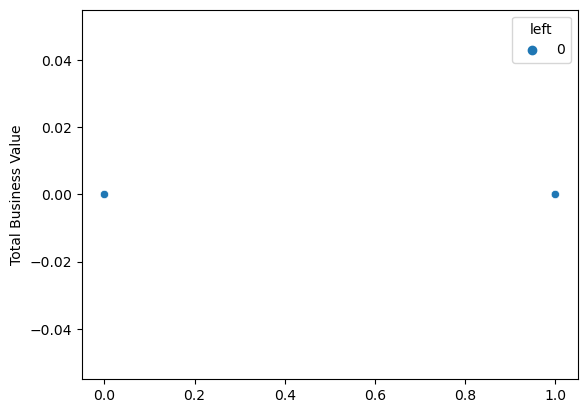

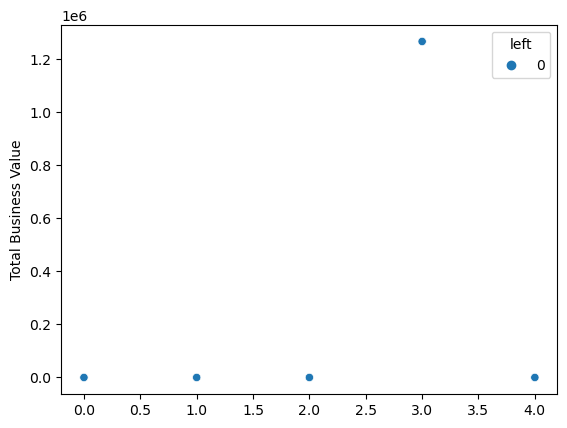

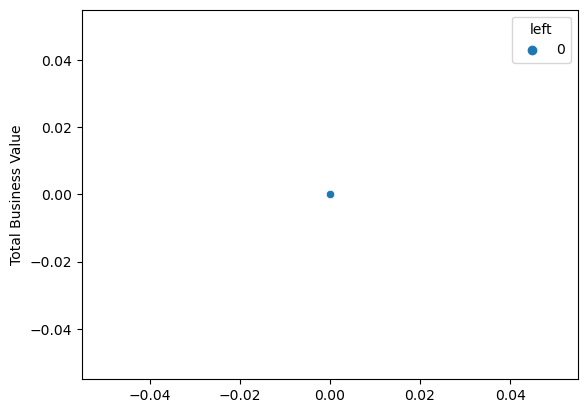

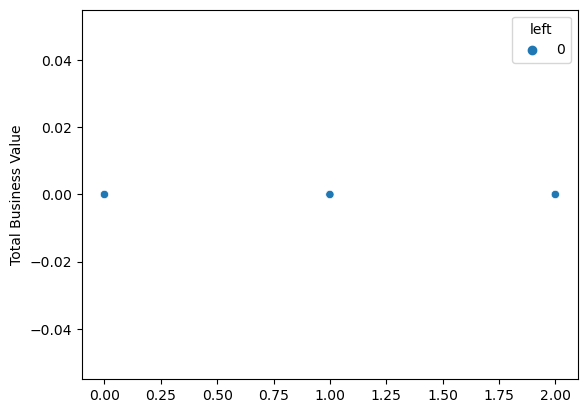

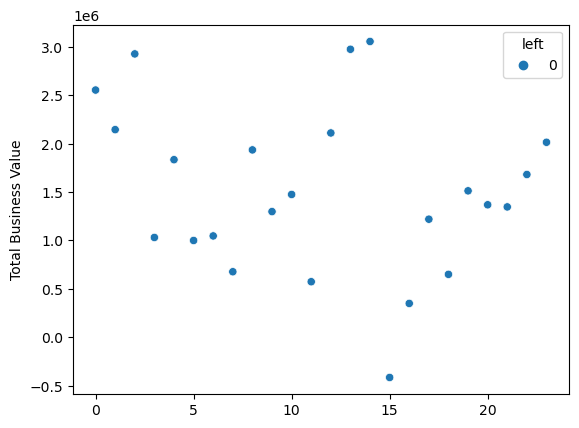

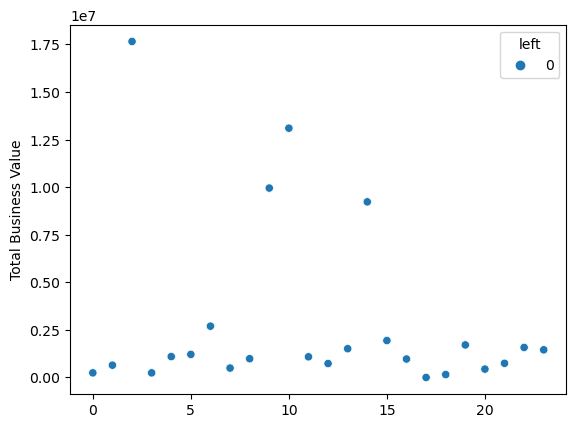

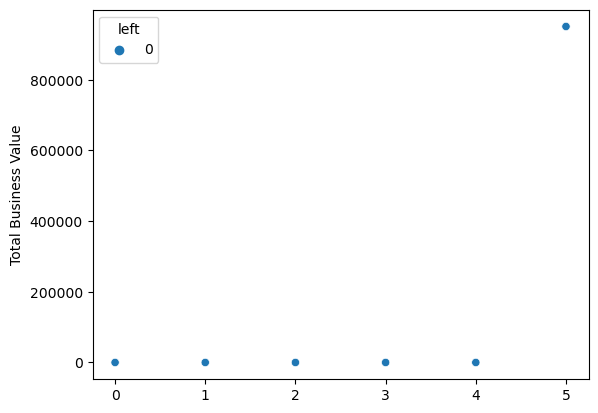

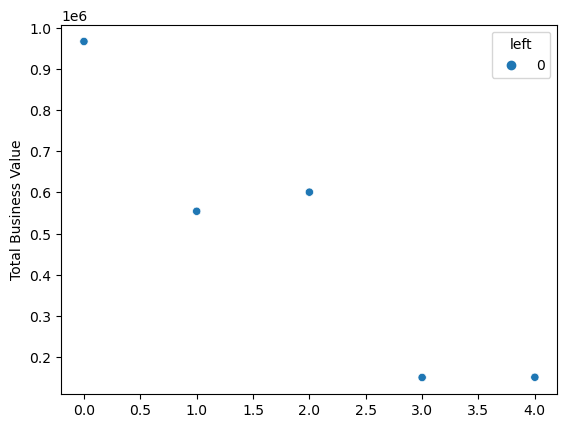

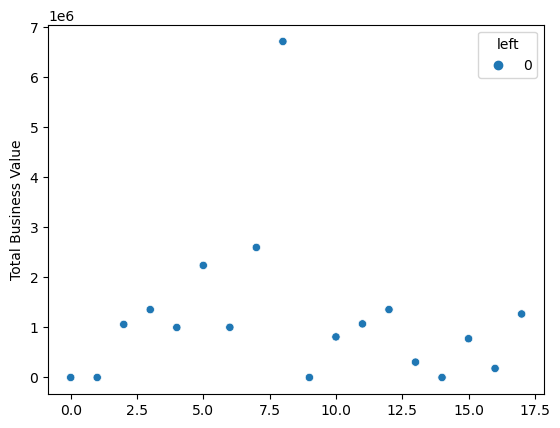

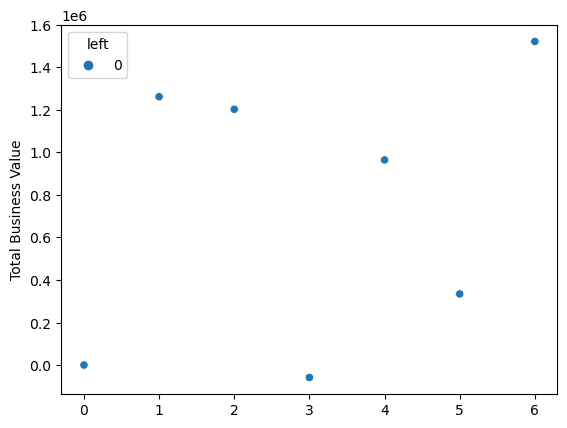

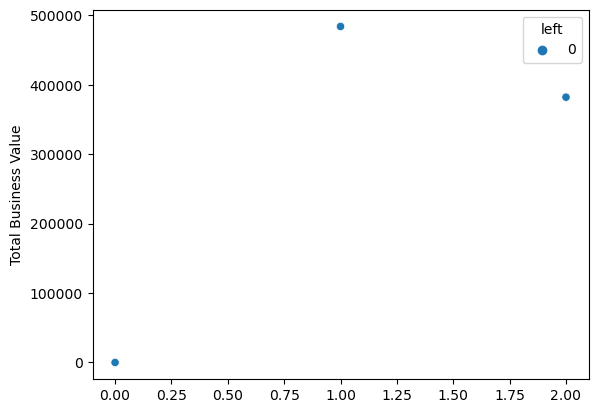

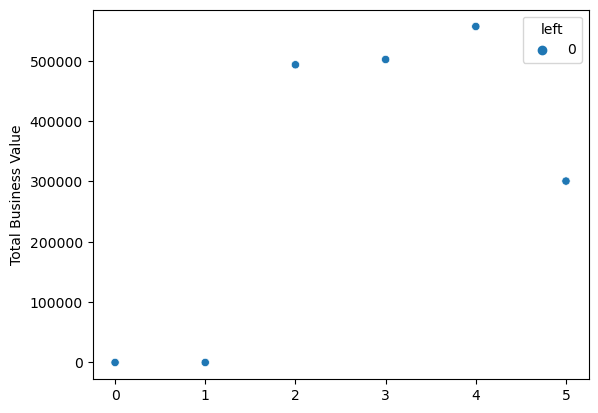

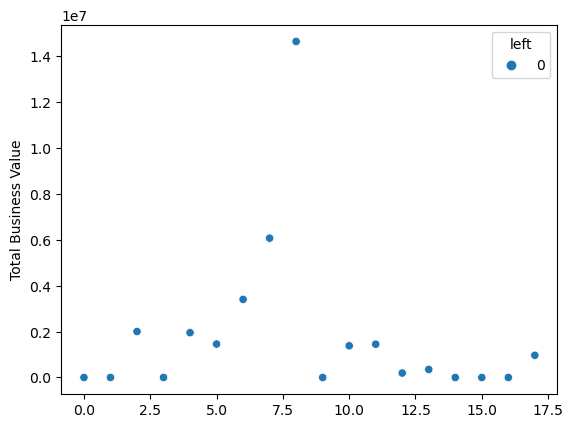

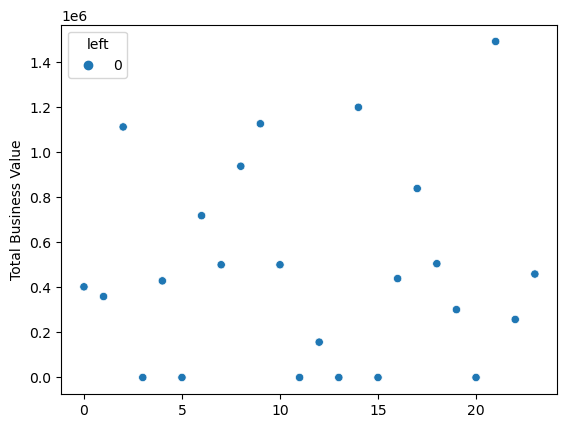

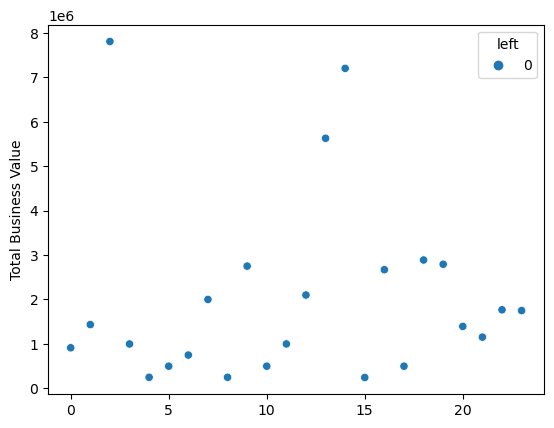

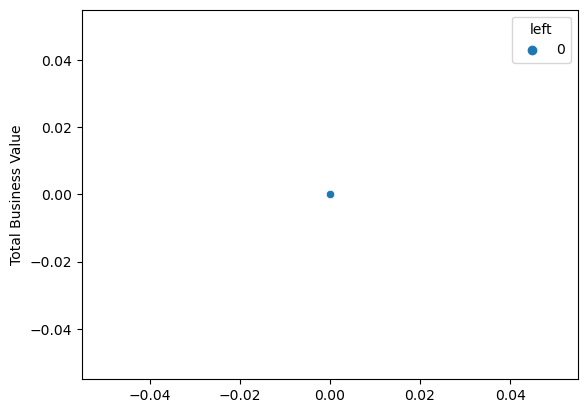

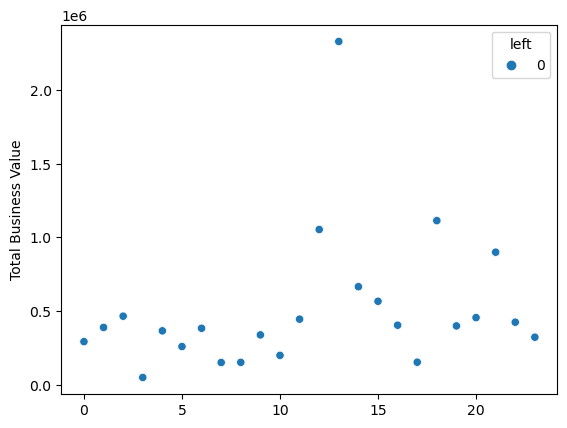

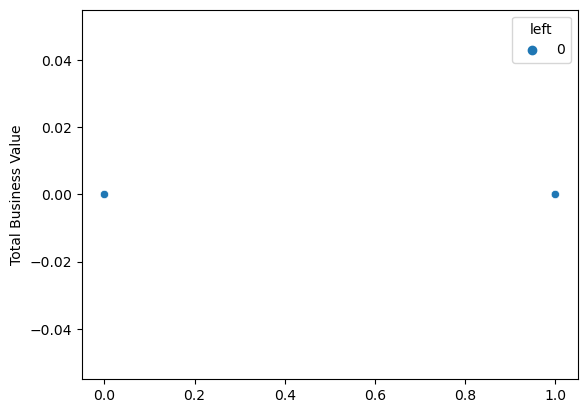

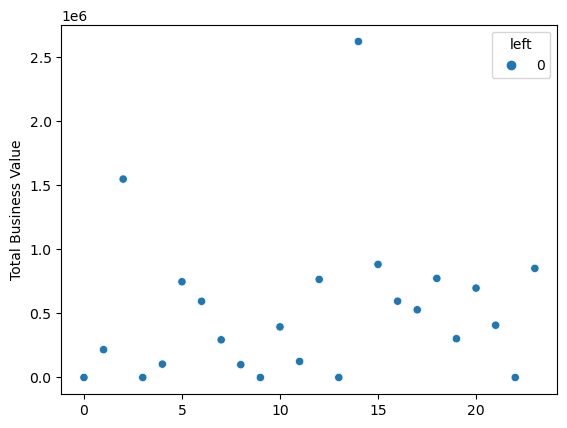

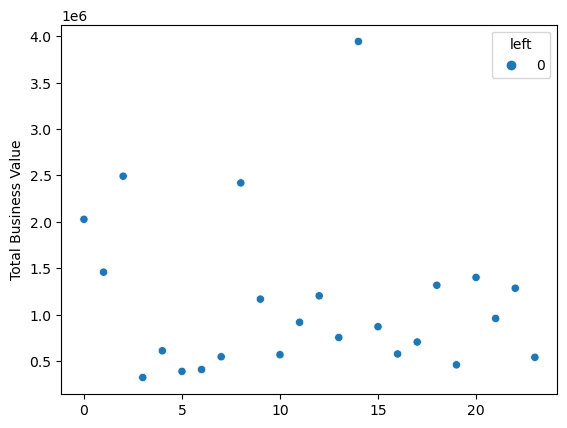

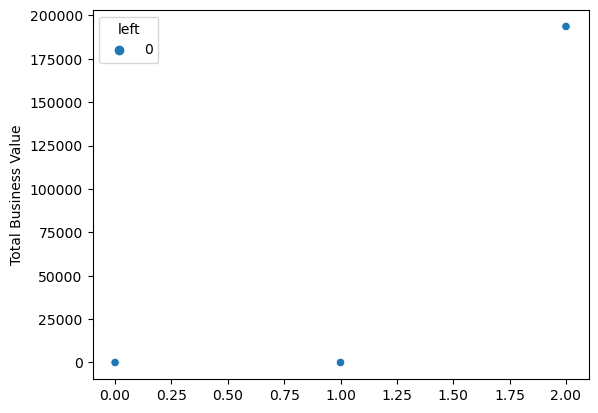

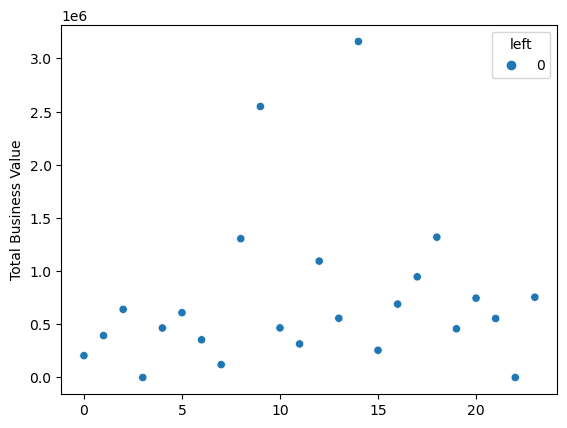

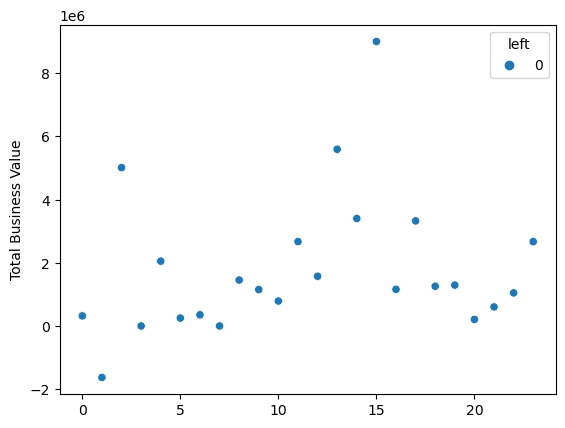

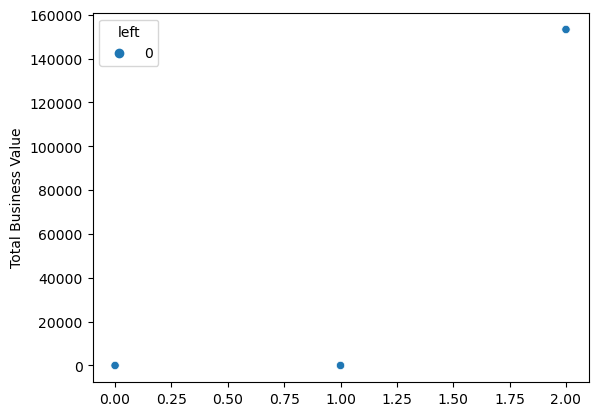

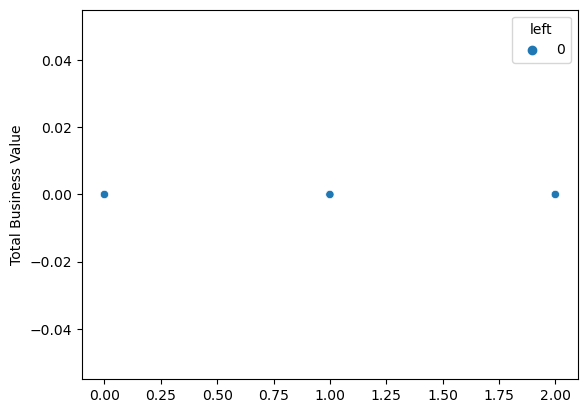

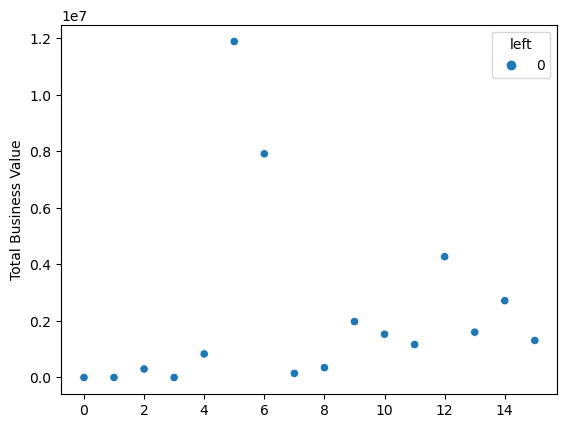

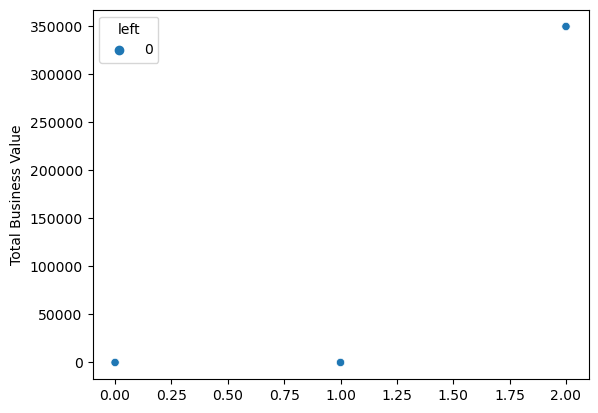

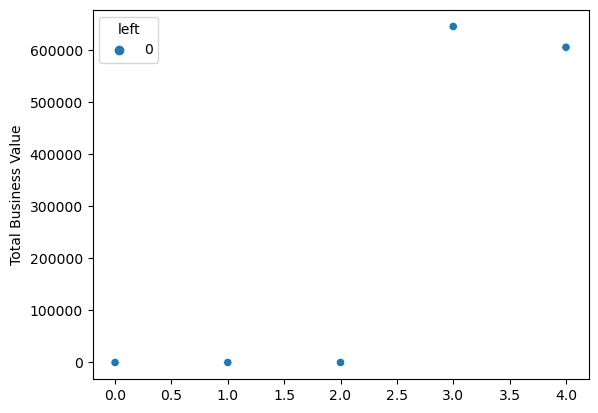

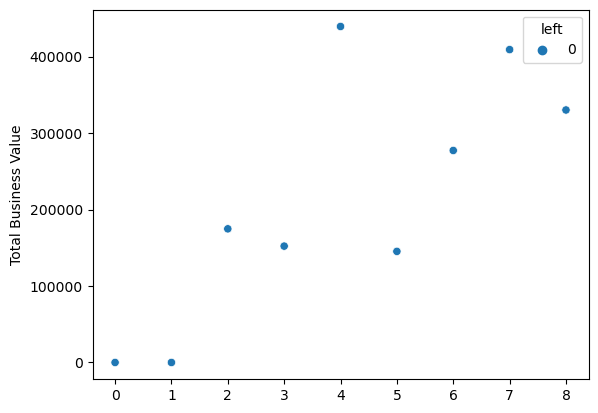

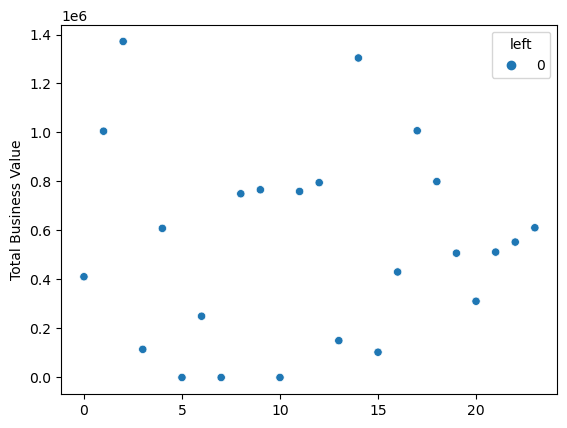

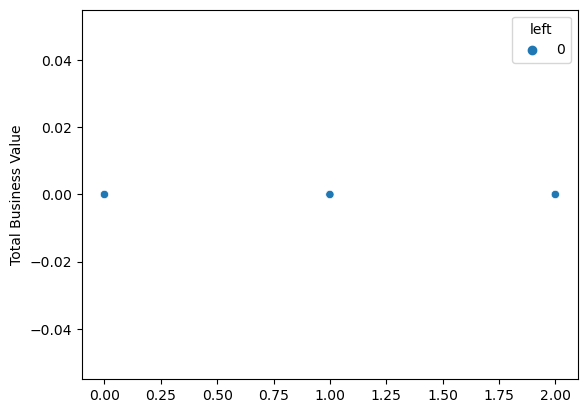

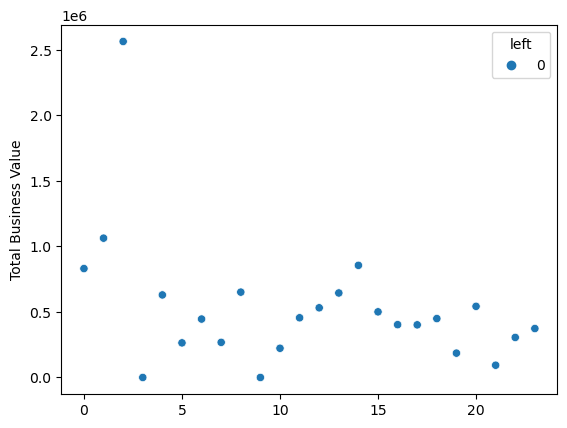

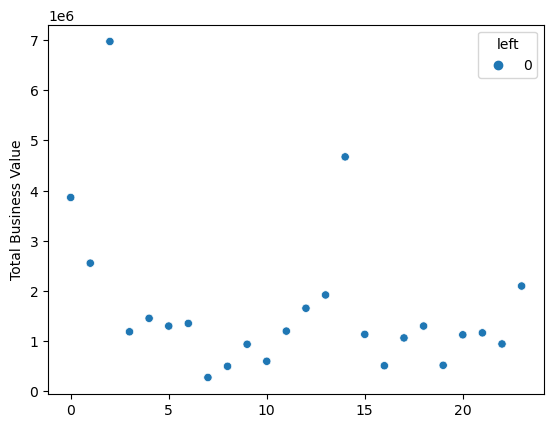

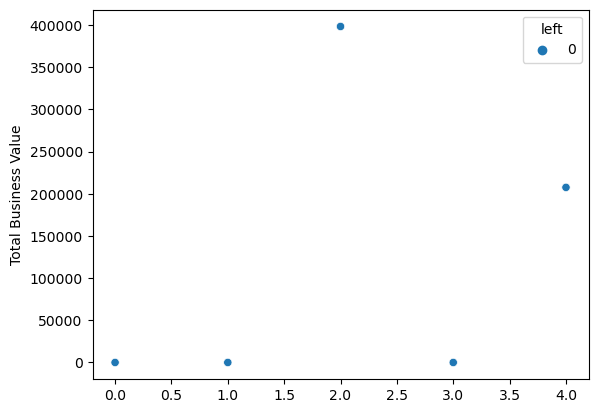

In [145]:
for i,d in enumerate(df['Driver_ID'].unique()):
    df_ = df[df['Driver_ID']==d]
    if sum(df_['left'])==0:
        sns.scatterplot(data=df_,y='Total Business Value',x=range(len(df_)),hue=df_['left'])
        plt.show()
        if i>100:
            break

In [ ]:
find z score, find if negative values

In [ ]:
for i,d in enumerate(df['Driver_ID'].to_list()):
    df_ = df[df['Driver_ID']==d]
    sns.scatterplot(data=df_,y='Quarterly Rating',x=range(len(df_)),hue=df_['left'])
    plt.show()
    if i>100:
        break